In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

from setup.univ_setup import *
from setup.utils import *

from factor_mining.factors.momentum import *

In [2]:
### universe setup ###
datadir = '/home/derek-qi/Documents/R3000_Data/data/r3000/'
univ = univ_setup(datadir, silent=False)
filt_na(univ)
import warnings
warnings.filterwarnings("ignore")

Setup R3000 universe
use existing binary file
0.552417 seconds


In [3]:
univ_table = stack(univ)
univ_table.date = pd.to_datetime(univ_table.date)

In [4]:
mmt_dict = momentum(univ_table, 4, 52)
mmt_table = stack(mmt_dict)

In [6]:
mmt_smooth_dict = momentum(univ_table, 4, 52, weight='ewma')
mmt_smooth_table = stack(mmt_smooth_dict)

In [18]:
table = univ_table.loc[univ_table.ticker=='AMZN',:].copy()

In [20]:
mmt_ewma_dict = momentum_ewma(univ_table, 4, 52, halflife=13)
mmt_ewma_table = stack(mmt_ewma_dict)

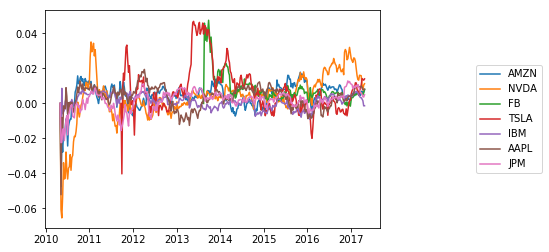

In [23]:
selTickers = ['AMZN', 'NVDA', 'FB', 'TSLA', 'IBM', 'AAPL', 'JPM']
target = mmt_ewma_table
for ticker in selTickers:
    table = target[target.ticker == ticker]
    plt.plot(table.date, table.momentum_ewma.values, label=ticker)
plt.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5))
plt.show()

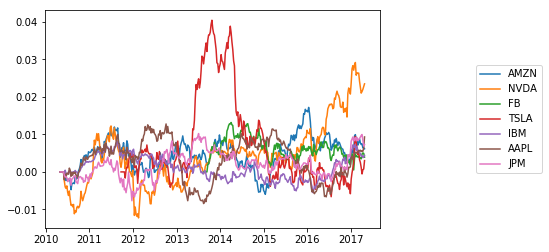

In [24]:
target = mmt_table
for ticker in selTickers:
    table = target[target.ticker == ticker]
    plt.plot(table.date, table.momentum.values, label=ticker)
plt.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5))
plt.show()